<h1> Titanic Survival Analysis</h1>



**Competition:** Titanic: Machine Learning from Disaster  
**File Used:** `train.csv`  
**Dataset Source:** Kaggle  
https://www.kaggle.com/competitions/titanic/data


**Overview**
This notebook takes a closer look at the Titanic passenger dataset through exploratory data analysis to find out what might have influenced survival.

The dataset contains details about passengers, including their age, gender, ticket class, and other travel-related information. The first step is to examine the dataset to understand its layout, spot any missing or inconsistent data, and evaluate its overall quality. Data cleaning and preparation are then done to fill in missing values and remove unnecessary columns.

Next, I use visualizations and statistical methods to explore connections between different features and survival outcomes, helping to highlight key factors that could have affected whether a passenger survived the tragedy.

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Data Overview & Structure </h3>
</div>

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [44]:
df = pd.read_csv("/content/drive/MyDrive/Lec11/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
df.head(3)
df.tail(3)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">

---

<h3> Identifying Data Quality Issues </h3>
</div>

In [47]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [48]:
(df.isnull().mean() * 100).sort_values(ascending=False)

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [49]:
df_clean = df.copy()
df_clean.columns = df_clean.columns.str.strip().str.lower()
df_clean.drop(columns=['passengerid', 'ticket', 'cabin', 'name'], inplace=True)
df_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

##  Data Cleaning Summary

- Removed non-informative identifiers (Name, Ticket, PassengerId).
- Dropped Cabin due to a high proportion of missing values.
- Imputed missing age values using gender-based median imputation.
- Handled missing embarkation values via random assignment from existing categories.

##Data Preprocessing

In [52]:
print("Original DataFrame:")
print(df_clean)
print("\n")

le = LabelEncoder()

df_clean['sex_encoded'] = le.fit_transform(df_clean['sex'])
df_clean['embarked_encoded'] = le.fit_transform(df_clean['embarked'])

print("DataFrame after Label Encoding:")
df_clean.head(5)

Original DataFrame:
     survived  pclass     sex   age  sibsp  parch     fare embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


DataFrame after Label Encoding:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,sex_encoded,embarked_encoded
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 20px 0;">
<h3>Survival Analysis by Age </h3>
</div>

In [53]:
df_clean['age'] = df_clean['age'].fillna(df_clean.groupby('sex')['age'].transform('median'))
df_clean['age'].isnull().sum()

np.int64(0)

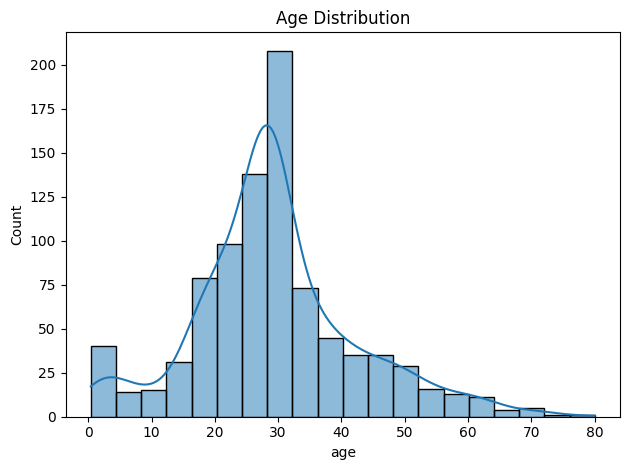

In [54]:
sns.histplot(df_clean['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

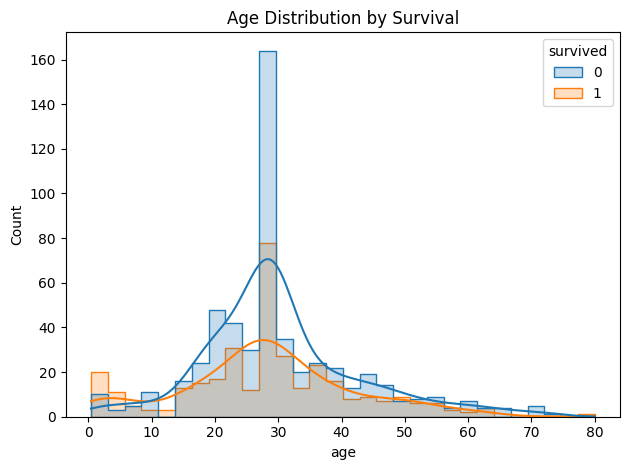

In [55]:
sns.histplot(data=df_clean,x='age',hue='survived',bins=30,kde=True,element='step')
plt.title('Age Distribution by Survival')
plt.tight_layout()
plt.show()

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Survival Analysis by Age Group</h3>
</div>

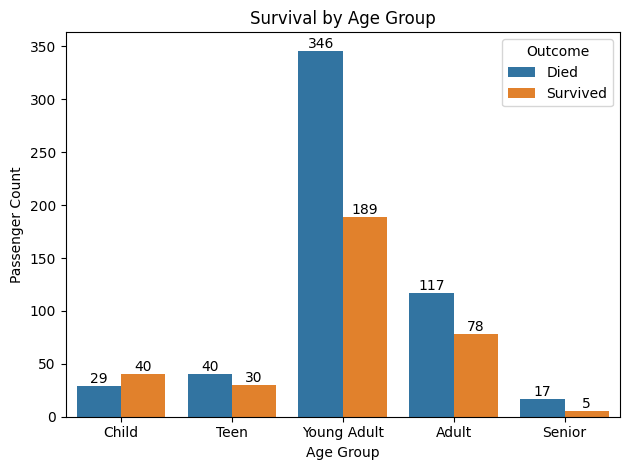

In [56]:
df_clean['age_group'] = pd.cut(
    df_clean['age'],
    bins=[0,12,18,35,60,100],
    labels=['Child','Teen','Young Adult','Adult','Senior']
)

ax = sns.countplot(x='age_group',hue='survived',data=df_clean)

plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Passenger Count')

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.legend(title='Outcome', labels=['Died', 'Survived'])
plt.show()


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Survival Analysis by Embarkation Port</h3>
</div>

In [57]:
df_clean['embarked'].isna().sum()

np.int64(2)

In [58]:
ports = df_clean['embarked'].dropna().unique().tolist()          # ['S', 'C', 'Q']

df_clean.loc[df_clean['embarked'].isnull(), 'embarked'] = np.random.choice(ports, size=df_clean['embarked'].isnull().sum())
df_clean['embarked'].isna().sum()

np.int64(0)

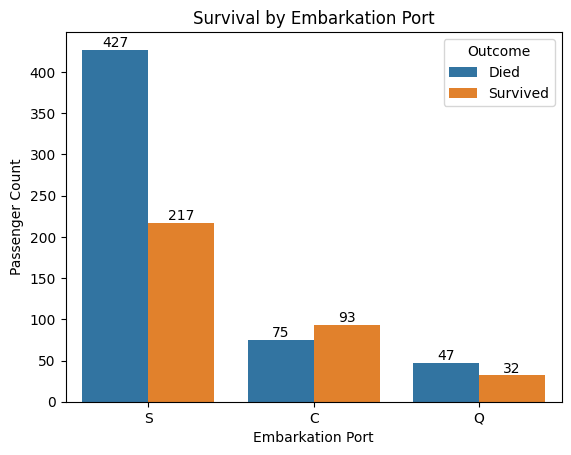

In [59]:
ax = sns.countplot(x='embarked', hue='survived', data=df_clean,hue_order=[0,1])
plt.title('Survival by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Passenger Count')
plt.legend(title='Outcome',    labels=['Died', 'Survived'])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

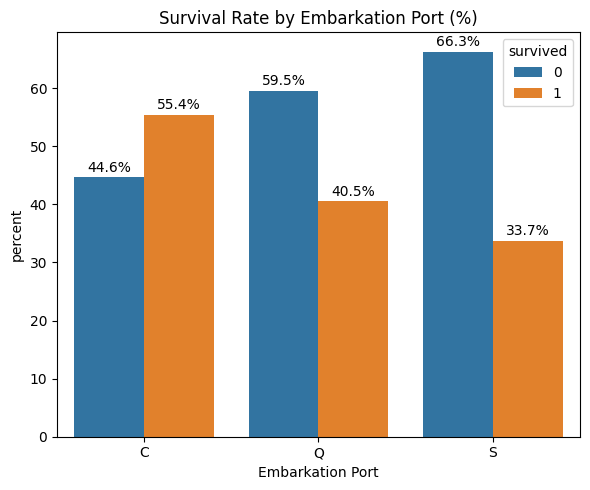

In [60]:
plt.figure(figsize=(6, 5))

counts = ( df_clean.groupby(['embarked', 'survived']).size().reset_index(name='count'))
counts['percent'] = (counts['count'] / counts.groupby('embarked')['count'].transform('sum') * 100)

ax = sns.barplot(x='embarked', y='percent', hue='survived',data=counts)
ax.set_title("Survival Rate by Embarkation Port (%)")
ax.set_xlabel("Embarkation Port")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=2)

plt.tight_layout()
plt.show()

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Survival Analysis by Gender</h3>
</div>

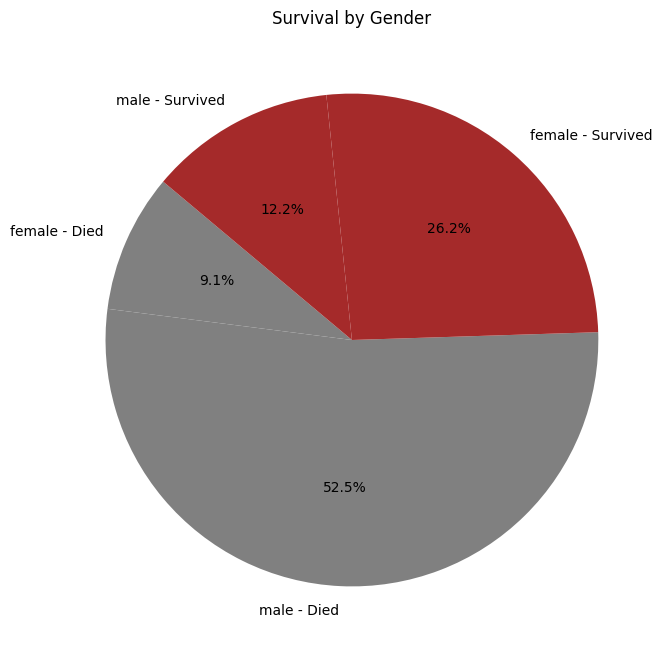

In [61]:
gender_survival = df_clean.groupby('sex')['survived'].value_counts().unstack(fill_value=0)

died = gender_survival[0]
survived = gender_survival[1]

labels = [f"{sex} - Died" for sex in gender_survival.index] + [f"{sex} - Survived" for sex in gender_survival.index]

sizes = pd.concat([died, survived])

colors = ['#808080', '#808080', '#A52A2A', '#A52A2A']

plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title("Survival by Gender")
plt.show()

In [62]:
print(df_clean.groupby('sex')['survived'].value_counts())
print(df_clean.groupby('sex')['survived'].mean() * 100)   # % survived per group

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64
sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


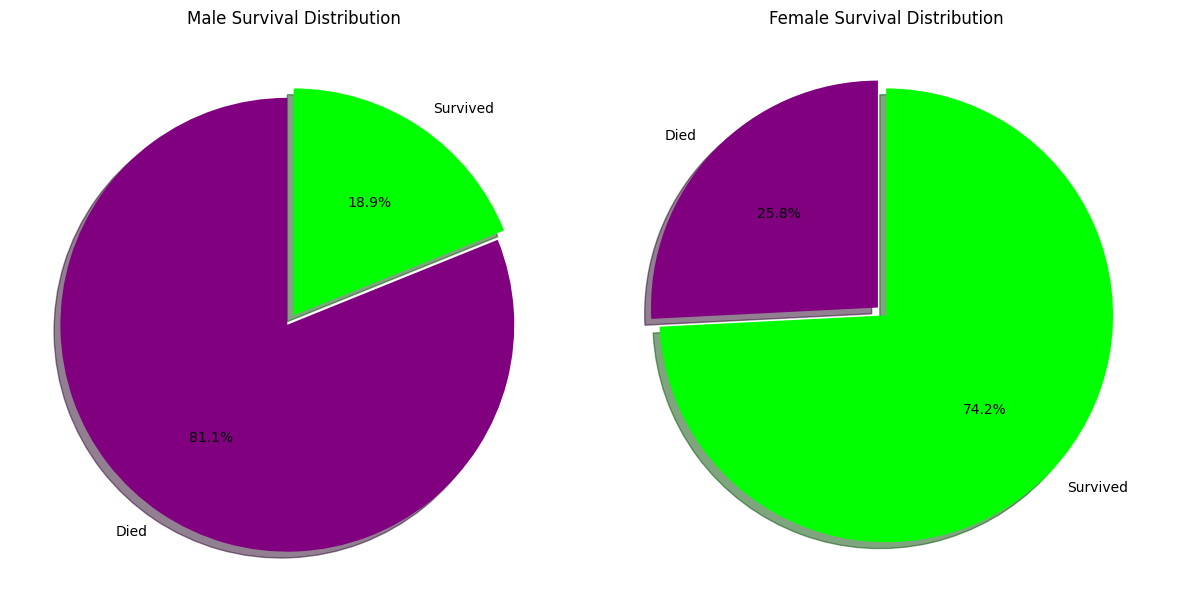

In [63]:
colors = ['#800080', '#00FF00']  # purple, green

labels = ['Died', 'Survived']

male_counts = df_clean.loc[df_clean['sex'] == 'male', 'survived'].value_counts().reindex([0, 1], fill_value=0)

female_counts = df_clean.loc[df_clean['sex'] == 'female', 'survived'].value_counts().reindex([0, 1], fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    male_counts.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True,
    explode=[0.05, 0]
)
axes[0].set_title('Male Survival Distribution')

axes[1].pie(
    female_counts.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True,
    explode=[0.05, 0]
)
axes[1].set_title('Female Survival Distribution')

plt.tight_layout()
plt.show()

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Survival Analysis by Passenger Class</h3>
</div>

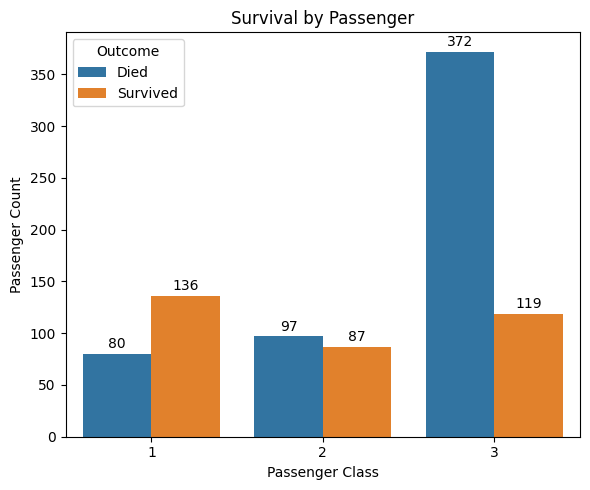

In [64]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x='pclass',hue='survived',data=df_clean)
ax.set_title("Survival by Passenger")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Passenger Count")

for container in ax.containers:
    ax.bar_label(container, padding=2)

ax.legend(title='Outcome', labels=['Died', 'Survived'])
plt.tight_layout()
plt.show()


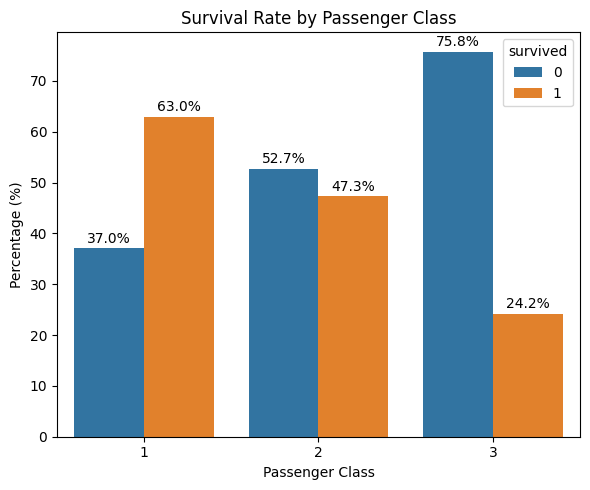

In [65]:
plt.figure(figsize=(6, 5))

counts = ( df_clean.groupby(['pclass', 'survived']).size().reset_index(name='count'))
counts['percent'] = (counts['count'] / counts.groupby('pclass')['count'].transform('sum') * 100)


ax = sns.barplot(x='pclass', y='percent', hue='survived',data=counts)
ax.set_title("Survival Rate by Passenger Class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Percentage (%)")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=2)

plt.tight_layout()
plt.show()


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Summary </h3></div>

Survival on the Titanic was most strongly influenced by a passenger’s gender, age, and class.

Women and younger passengers had better chances of surviving compared to men and adults.

Passengers traveling in first-class were more likely to survive than those in lower classes.

The port where passengers boarded had a smaller impact on survival, likely because of its association with passenger class.